In [1]:
import pandas as pd
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None  # default='warn'
pd.options.display.float_format = '{:.2f}'.format

In [2]:
tables = pd.read_html("https://en.wikipedia.org/wiki/List_of_countries_by_carbon_dioxide_emissions")
countries = tables[1].loc[3:]

# **PLOT 1**

In [ ]:
countries.columns = ["country", "1990", "2005", "2017", "fos%", "fos%change", "per_area", "per_capita", "lucf_inc", "lucf_excl"]
countries.reset_index(inplace = True,drop = True)

In [4]:
fos17_sorted = countries.sort_values(by=["2017"], ascending= False)
fos17_sorted.reset_index(inplace = True,drop = True)
final = fos17_sorted.loc[0:4,["country","1990", "2005", "2017"]]

# **FIGURE 1**

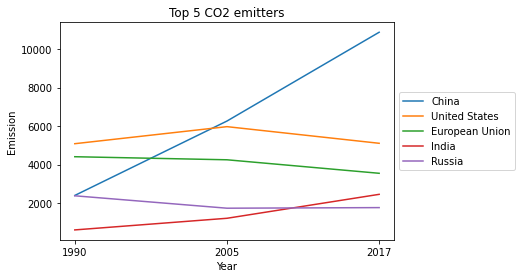

In [5]:
fig, ax = plt.subplots()

years = final.columns[1:]

for index, row in final.iterrows():
  plt.plot(years, row[1:], label=row[0])

plt.title("Top 5 CO2 emitters")
plt.xlabel("Year")
plt.ylabel("Emission")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

# **PLOT 2**

# **FIGURE 2**

In [6]:
changers = countries
changers["change"] = (changers.loc[:,"2017"] / changers.loc[:,"1990"]) * 100

changers_sorted = changers.sort_values(by=["change"], ascending= False)
head_change = changers_sorted.head(3)
head_tail_change = head_change.append(changers_sorted.tail(3))

head_tail_change.reset_index(inplace = True,drop = True)

top_bott_change = head_tail_change.loc[:, ["country","1990", "2005", "2017"]]
top_bott_change.columns = ["country","fos90", "fos05", "fos17"]

top_bott_change["1990"] = top_bott_change.loc[:,"fos90"] / top_bott_change.loc[:,"fos90"] * 100
top_bott_change["2005"] = top_bott_change.loc[:,"fos05"] / top_bott_change.loc[:,"fos90"] * 100
top_bott_change["2017"] = top_bott_change.loc[:,"fos17"] / top_bott_change.loc[:,"fos90"] * 100

perc_change = top_bott_change.loc[:, ["country","1990", "2005", "2017"]]

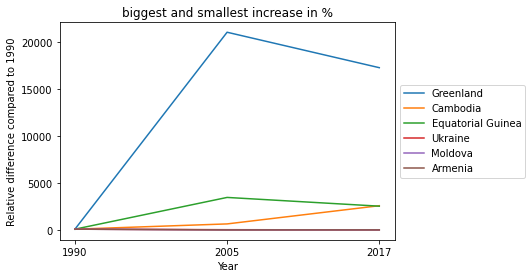

In [7]:
fig, ax = plt.subplots()

years = perc_change.columns[1:]

for index, row in perc_change.iterrows():
  plt.plot(years, row[1:], label=row[0])

plt.title("biggest and smallest increase in %")
plt.xlabel("Year")
plt.ylabel("Relative difference compared to 1990")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

# **FIGURE 3**

In [8]:
large_countries = countries[countries["2017"] > 5]
large_countries["change"] = (large_countries.loc[:,"2017"] / large_countries.loc[:,"1990"]) * 100

change_sorted = large_countries.sort_values(by=["change"], ascending= False)
head = change_sorted.head(3)
head_tail = head.append(change_sorted.tail(3))

head_tail.reset_index(inplace = True,drop = True)

top_bott = head_tail.loc[:, ["country","1990", "2005", "2017"]]
top_bott.columns = ["country","fos90", "fos05", "fos17"]

top_bott["1990"] = top_bott.loc[:,"fos90"] / top_bott.loc[:,"fos90"] * 100
top_bott["2005"] = top_bott.loc[:,"fos05"] / top_bott.loc[:,"fos90"] * 100
top_bott["2017"] = top_bott.loc[:,"fos17"] / top_bott.loc[:,"fos90"] * 100

perc = top_bott.loc[:, ["country","1990", "2005", "2017"]]

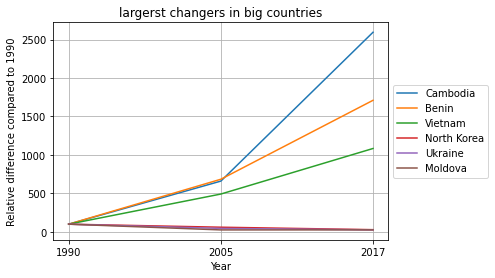

In [9]:
fig, ax = plt.subplots()

years = perc.columns[1:]

for index, row in perc.iterrows():
  plt.plot(years, row[1:], label=row[0])

plt.title("largerst changers in big countries")
plt.xlabel("Year")
plt.ylabel("Relative difference compared to 1990")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.grid(True)

plt.show()